**AI** -> Enables computers and machines to perform human like tasks and stimulate human behaviour

**ML** -> ML is a subset of AI that tries to solve a specific problem and make predictions using data

**DS** -> DS is a field that attemps to find patterns and draw insights from data


## Types of Machine Learning

**Supervised Learning** -> used labeled inputs to traiin models and learn output

**Unsupervised learning** -> duses unlabeled data to learn about patterns in data

**Reinforcement learning** -> agent learning in interactive environment based on reward and penalties

### Lets learn deep about data

Now, all the inputs to the model are called Feature vector

Features
 > Qualitative - categorical data

   Its a nominal data (no inherent data ),for this we use one hot encoding -> iits says that if it matches the category then make it 1 otherwise zero

 Examples -> Gender, Nationality

 Its a ordiinal data ( inherent data )

 Example -> Age groups , Ratings

 > Quantitative data - numeric valued data ( could be discrete or continous )

 Continous -> Temperature

 Discrete -> Counting balls

## Types of predictions

1. Clasification -> predict discrete classes (categories), In this we have Binary and Multiclass

2. Regression -> predict continous values


Consider one DataFrame , Here :-

**Each Row** -> Different sample in the data

**Each column** -> Different Feature

Last, its the output label

**Feature Vector** -> Single Row consisting of all features

**Target Vector** -> Target or  output to that feature vector

All of these together is called **Feature matrix,x**

Comparing the models output is called **training the model**.

We break up our data set into 3 different types of dataset ,

**Trainind Set** -> to train and adjust whats going wrong , here losss gets feed back to model

**Validation Set** -> its like reality check, here loss never gets feed back into model

**Test set** -> Final check , how generalizable the chosen model is

**Loss** -> Difference between the prediction and actual label

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset

The dataset simulates how a Cherenkov gamma telescope detects high-energy gamma rays from space. When these rays hit the Earth's atmosphere, they create showers of particles that emit Cherenkov light. The telescope captures this light, forming patterns called shower images.

By analyzing the shape, size, and orientation of these patterns, scientists can distinguish between gamma rays (signal) and other particles (background). The data was generated using a simulation program called Corsika to model how these particle showers behave, with energy levels as low as 50 GeV.

In [2]:
# creating a list to rename all columns like giving them lebels
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df['class'].unique()

array(['g', 'h'], dtype=object)

Our comp is not that good at understanding letters so we are gonna convert this to zeros and ones

zero -> g
one -> h

In [4]:
df["class"] = (df["class"] == "g").astype(int)

In [5]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


## Problem Statement

Predict for  future samples where it is class G for gamma or H for hadron and well this is called classification.

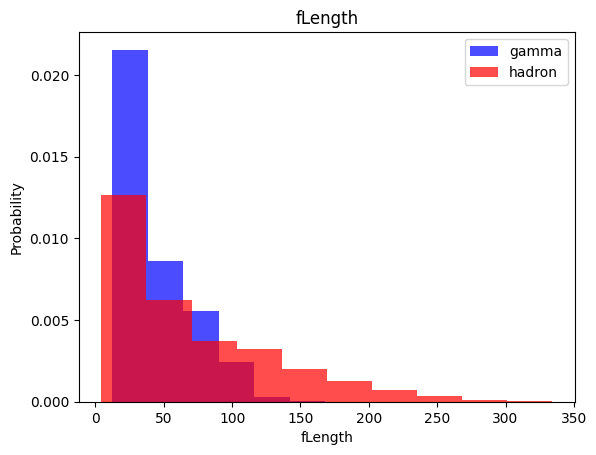

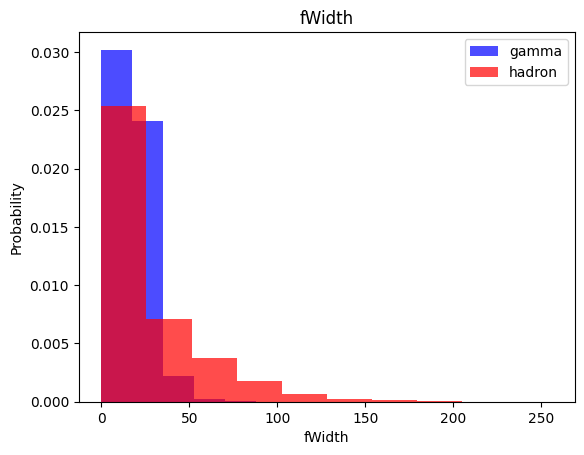

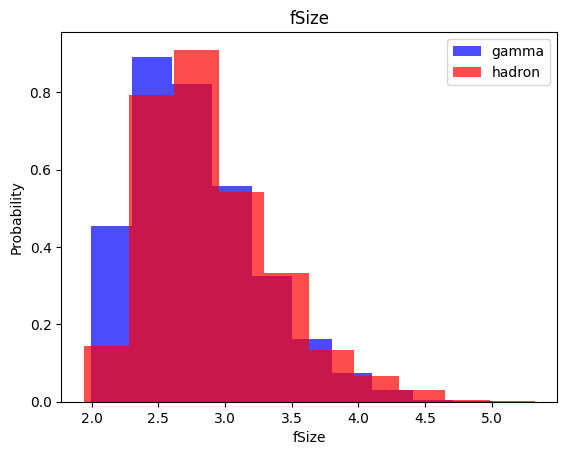

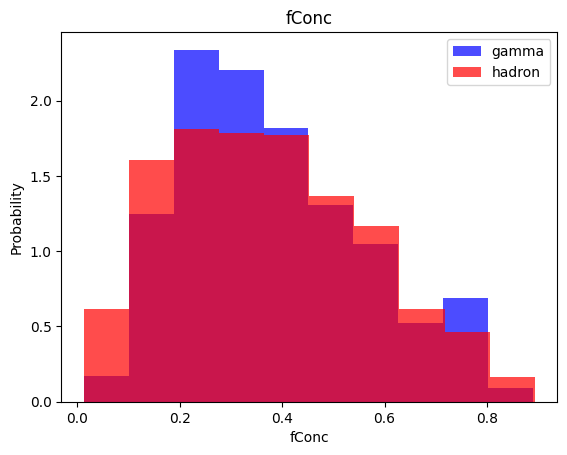

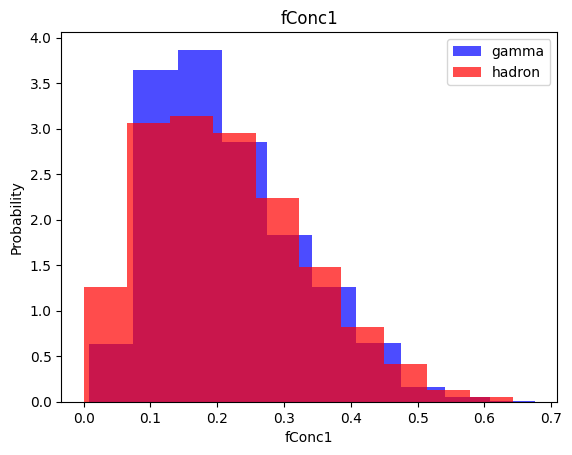

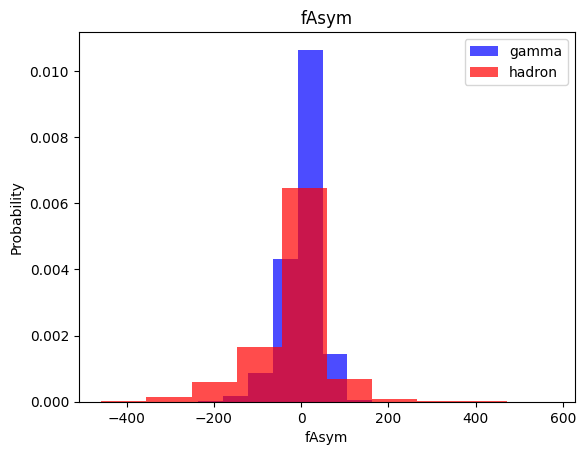

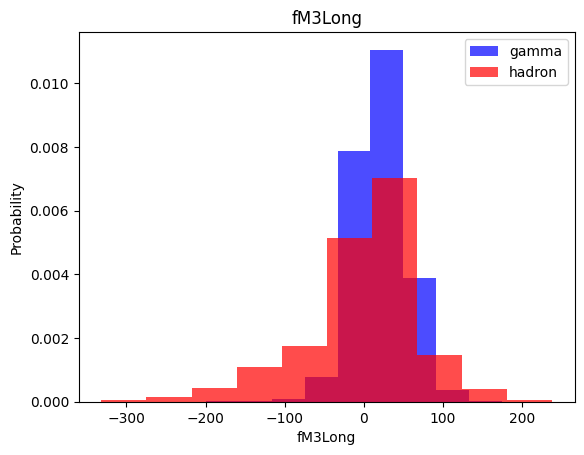

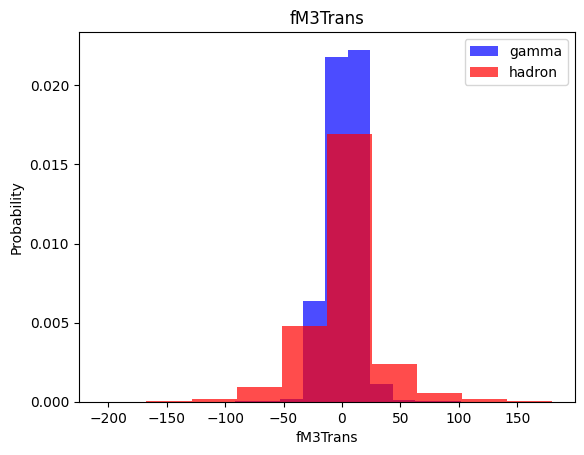

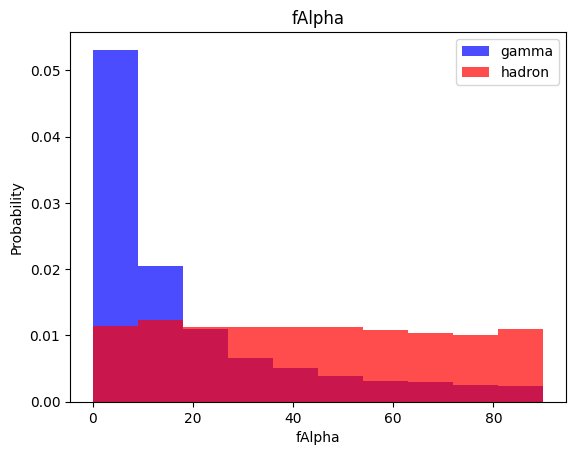

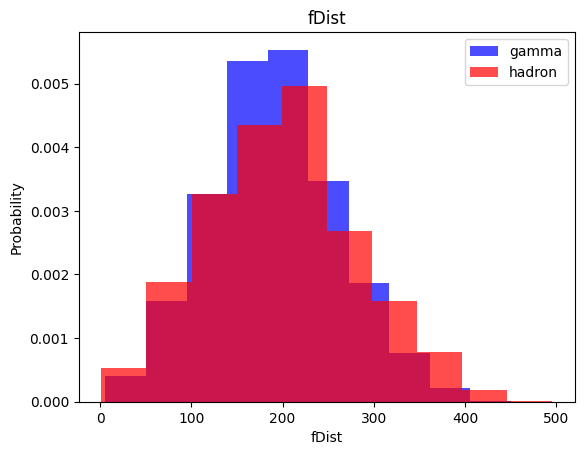

In [6]:
# Plotting Histogram
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

### Train , Validation , Test Datasets

In [7]:
#  line is a concise way to randomly shuffle a dataset and split it into 60% training, 20% validation, and 20% testing sets.
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
# scale the data -> so that it is relative to mean or sd of data
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values # feature columns
  y = dataframe[dataframe.columns[-1]].values # target column

  scaler = StandardScaler() # initializes a scaler that standardizes data by removing the mean and scaling to unit variance.
  # Calculats mean and sd and Scales the features so that each has a mean of 0 and a standard deviation of 1.
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler() # duplicates sample
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1)))) # reshape and horizontally stacks the x and y

  return data, X, y

In [9]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [10]:
len(y_train)

14814

In [11]:
sum(y_train == 1)

np.int64(7407)

In [12]:
sum(y_train == 0)

np.int64(7407)

## Supervised Models - Classification

### K-nearest neighbors

You look whats around you and take the label of majority.

For this first we need to have distance fuction, which may be euclidian distance (straight libe disrance).

K defines that how many labels are actually there to judje the label.That we decide it according to us you can set it.

We could expand the dimensions if we have more features.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [14]:
# Fitting the model and here k = 5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
# predict the labels for the test data using the trained KNN model
# here, variable y we are predicting
y_pred = knn_model.predict(X_test)

In [16]:
# generating report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1313
           1       0.87      0.87      0.87      2491

    accuracy                           0.83      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



### Naive Bayes
 We can apply the bayes rule or formula and do classification.

 We calculate for every evidence. and each feature of them is independent.

  Naive Bayes applies Bayes' Theorem to calculate the probability of each class for given features and picks the one with the highest probability

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [19]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.39      0.48      1313
           1       0.73      0.88      0.80      2491

    accuracy                           0.71      3804
   macro avg       0.68      0.63      0.64      3804
weighted avg       0.70      0.71      0.69      3804



### Logistic Regression

We are estimating the probabiliity that it can be 0 or 1

We are trying to fit our data to sigmoid function.

X0 - Simple Logistic regression
X0,X1,X2.....Xn - Multiple Logistic regression

Converts linear output into probabilities using the sigmoid function.

Helps in binary classification (Spam vs. Not Spam, Yes vs. No).

1. It uses a linear equation (like linear regression):
𝑧 = 𝑤1𝑥1+𝑤2𝑥2+⋯+𝑤𝑛𝑥𝑛+𝑏

(where w are weights, x are input featuresand b is the bias).

2. Applies the sigmoid function to convert the linear output to a probability between 0 and 1:
𝑃 = 1/1+e raise to -z

If
P>0.5, classify as Class 1.

If
P≤0.5, classify as Class 0.

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [22]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70      1313
           1       0.85      0.81      0.83      2491

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



### Support Vector Machine (SVM)

Here, goal is to find line between two labels that best divides.This line is SVM.

Its not the best model if we have outliers.

Margins - A larger margin means a better separation and more confidence in classification.The gap SVM maximizes to separate data classes.

Support vectors -  The critical data points closest to the margin. They "support" the boundary.

In [23]:
from sklearn.svm import SVC

In [24]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [25]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1313
           1       0.89      0.91      0.90      2491

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



### Neural Networks

Input layer -> Hidden layer -> Output layer

Features -> weight -> neurons (sum of all weights) + bias -> Activation Function (applying it) -> Output

Without activation function , neural nets would become kinear model.





In [26]:
import tensorflow as tf

In [27]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [28]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

In [30]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1313
           1       0.88      0.95      0.91      2491

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804



## Supervised Models - Regression

### Linear Regression
Simple Linear Regression

In this we have to find best fit line.

We are predicting the some continous numerical value along y.

y = b0 + b1x

Residual/Error - Difference between given point and prediction.

This best fit line tries to reduce this residual or decrease the error or sum of residual.

Multiple Linear Regression -> More the one feature for x

y = b0 + b1x1 + b2x2 +....+ bnxn

Assumptions -

Linearity - Does my data follows a linear pattern.

Independent - All the points in dataset should be independent its like one point should not have influence on other.

Normality - Residuals should be normally distributed around the line of best fit.

Homoskedasticity - Variance should remain constant.


### Evaluating Linear Regression Model

1. Mean Absolute Error (MAE)

   Average of all absolute residuals.

2. Mean Squared Error (MSE)

  Squaring the difference and then taking the average of all absolute residuals.It helps us to punish large errors.

3. Root Mean Square Error (RMSE)
   
   Square root of root mean square.

4. Coefficient of Determination
   
   RSS - Sum of squared residuals

   TSS - Total sum of squares

   summation( yi - y bar) (mean)

   R2(square) = 1 - RSS/TSS

### Importing Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

### Dataset

The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information.

In [33]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("/content/SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)

In [34]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

In [35]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


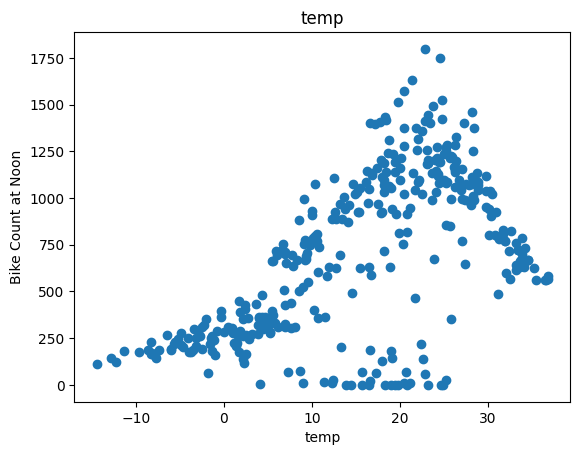

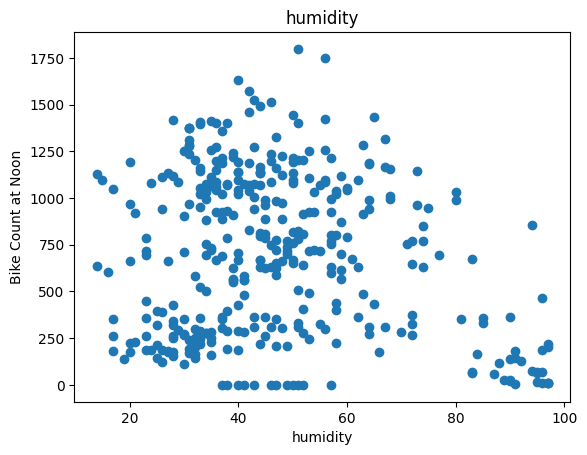

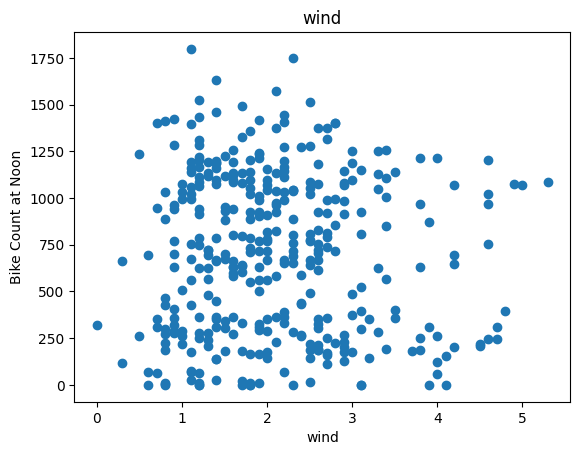

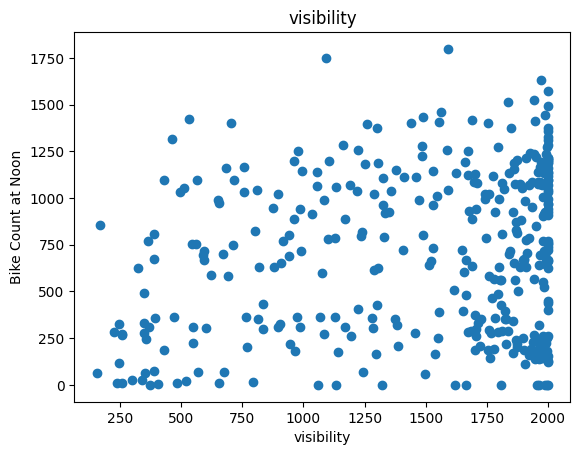

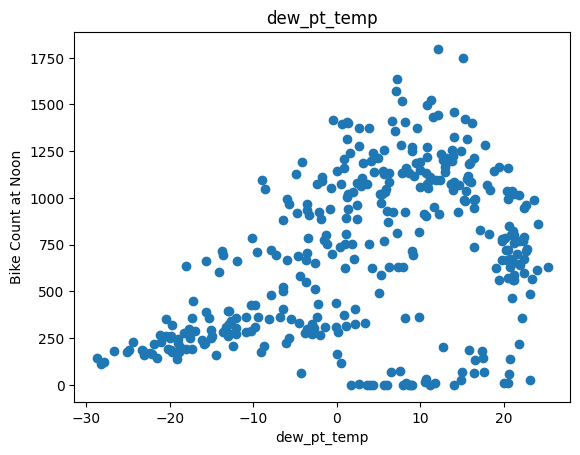

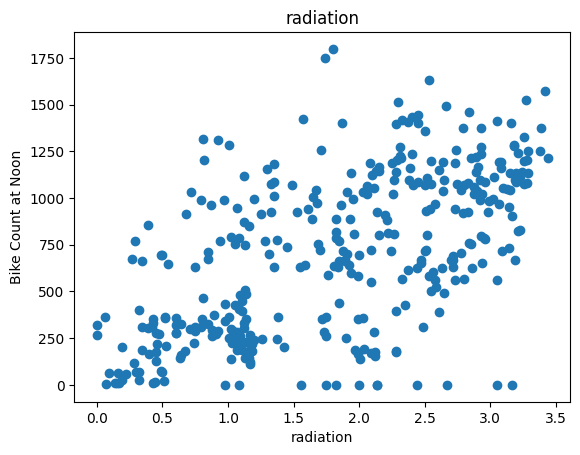

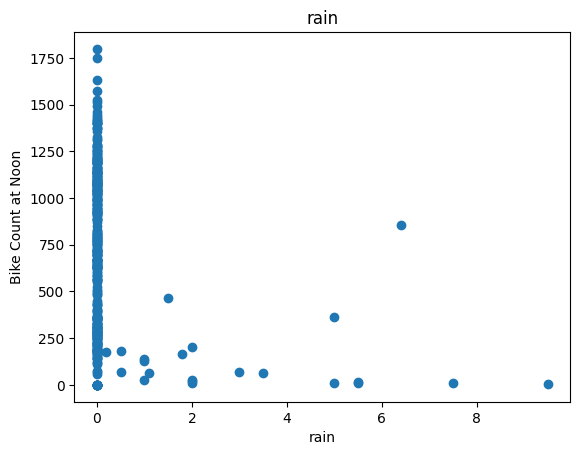

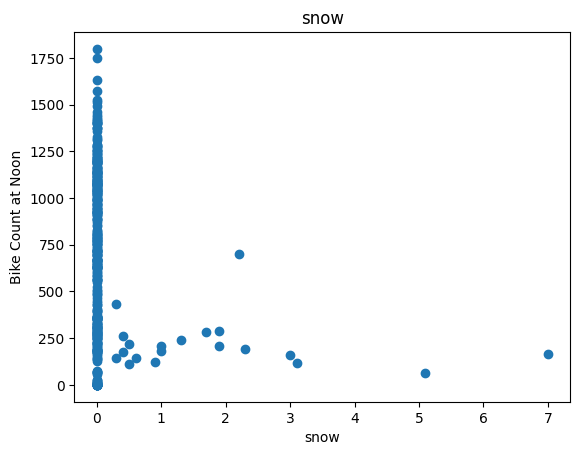

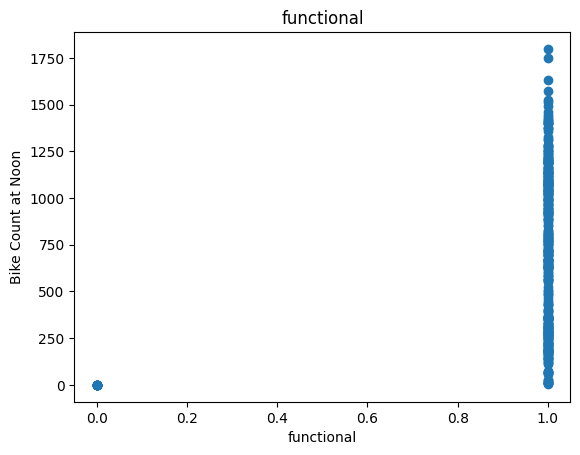

In [36]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [37]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

In [38]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


### Train,Valid,Test Dataset

In [39]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [40]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [41]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [42]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [43]:
temp_reg.score(X_test_temp, y_test_temp)

0.22487508764164554

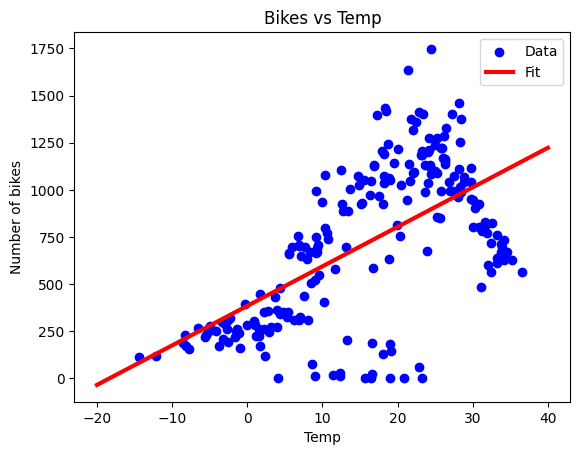

In [44]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [45]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [46]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [47]:
all_reg.score(X_test_all, y_test_all)

0.47555168809589765

In [48]:
y_pred_lr = all_reg.predict(X_test_all)